In [14]:
from qiskit import *
import matplotlib
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import *
from qiskit.providers.ibmq import *
from qiskit.providers.ibmq.job import job_monitor

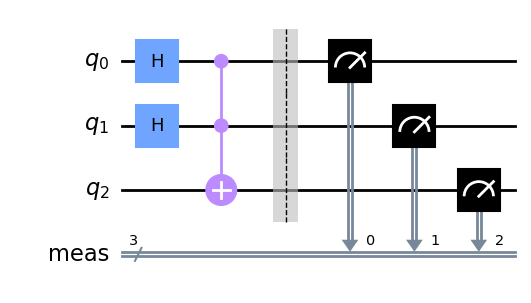

In [15]:
AndGate = QuantumCircuit(3)

AndGate.h(0)
AndGate.h(1)

AndGate.ccx(0,1,2)
AndGate.measure_all()

AndGate.draw()

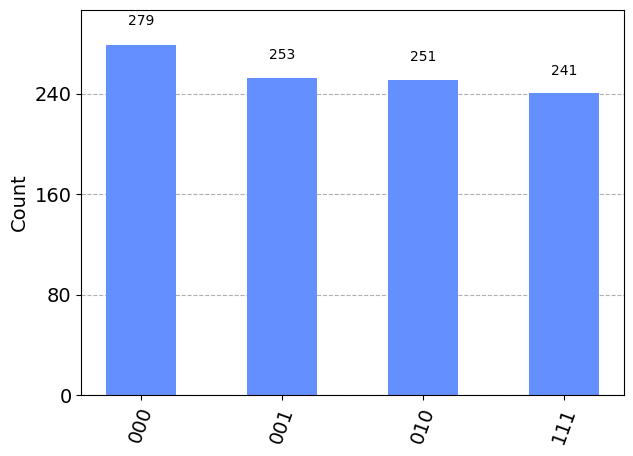

In [16]:
sim = AerSimulator()

job = execute(AndGate,sim,shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [17]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))

ibmqfactory.load_account:WARNING:2024-01-14 06:01:13,234: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


Job Status: job has successfully run


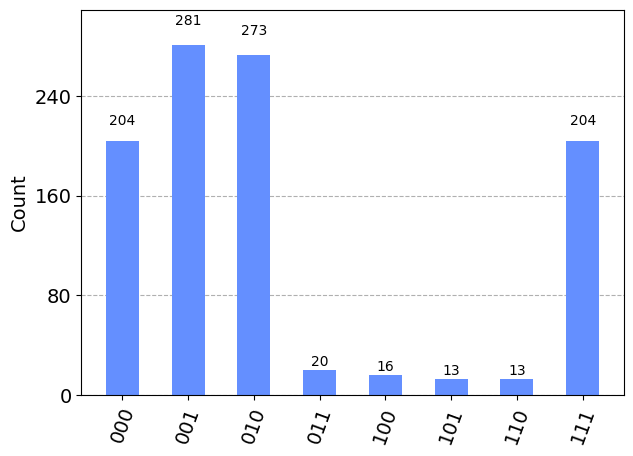

In [18]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)


dev = least_busy(dev_list)

job = execute(AndGate,dev,shots=1024)
job_monitor(job)

result = job.result()
counts_dev = result.get_counts()
plot_histogram(counts_dev)

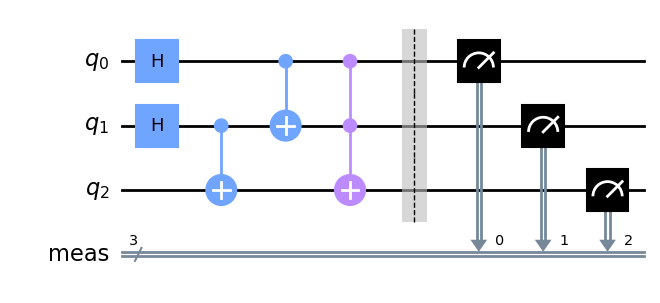

In [23]:
OrGate = QuantumCircuit(3)

OrGate.h(0)
OrGate.h(1)
OrGate.cx(1,2)
OrGate.cx(0,1)
OrGate.ccx(0,1,2)
OrGate.measure_all()

OrGate.draw()

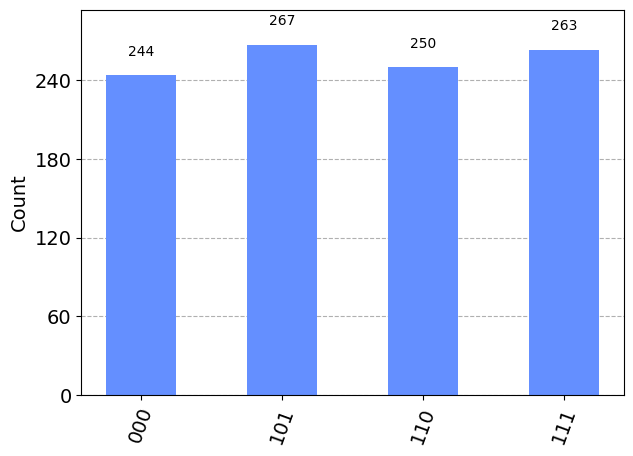

In [24]:
sim = AerSimulator()

job = execute(OrGate,sim,shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Job Status: job has successfully run


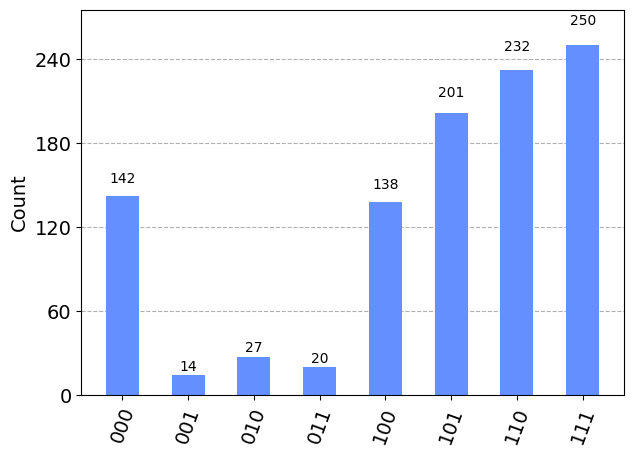

In [26]:
job = execute(OrGate,dev,shots=1024)
job_monitor(job)

result = job.result()
count_dev = result.get_counts()
plot_histogram(count_dev)